In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
from collections import Counter
import random
import math
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from sklearn import linear_model
from sklearn.model_selection import KFold as kf
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler

/Users/prathmesh/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
Fraud_dataframe = pd.read_csv('/Users/prathmesh/Downloads/test3.csv')
Fraud_dataframe.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


## we will draw a heat map to check for co-relations between two columns

/Users/prathmesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


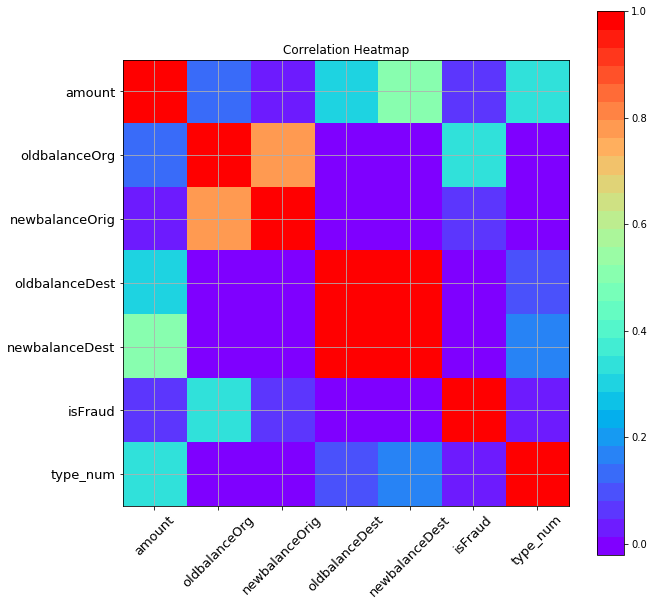

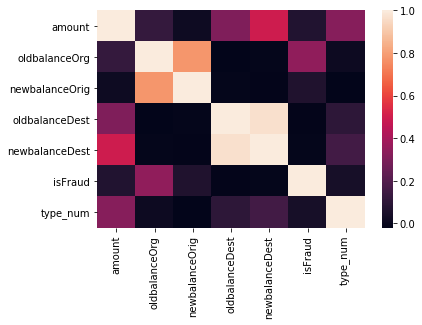

In [6]:
from statsmodels.tools import categorical
import matplotlib.cm as cm

# 1. Keep only interested transaction type ('TRANSFER', 'CASH_OUT')
# 2. Drop some columns
# 3. Convert categorical variables to numeric variable

trans_cashout_df = Fraud_dataframe.loc[(Fraud_dataframe['type'].isin(['TRANSFER', 'CASH_OUT'])),:]
trans_cashout_df.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
trans_cashout_df = trans_cashout_df.reset_index(drop=True)
a = np.array(trans_cashout_df['type'])
b = categorical(a, drop=True)
trans_cashout_df['type_num'] = b.argmax(1)

def correlation_plot(df):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('rainbow', 30)
    cax = ax1.imshow(df.corr(), interpolation = "nearest", cmap = cmap)
    ax1.grid(True)
    plt.title("Correlation Heatmap")
    labels = df.columns.tolist()
    ax1.set_xticklabels(labels, fontsize=13, rotation=45)
    ax1.set_yticklabels(labels, fontsize=13)
    fig.colorbar(cax)
    plt.show()
    
correlation_plot(trans_cashout_df)

# Alternatively, we can use quick seaborn
# plot the heatmap
sns.heatmap(trans_cashout_df.corr())

## analysis- 
### From the above heat map it is evident that the columns like 
### newBalanceDest & amount or isFraud & oldbalanceorg or isFraud & typenum are very closely related and can be analyzed further for predictions of fraud on these attributes